### Loan_Application_status

To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the accumulated details like credit history, loan amount, their income, dependents etc. 

In [1]:
# importing project dependencies:

# Data Wranglers
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine

#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset 
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())


Size of dataset 
  (614, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Details dataset
 None 

Checking for NULL/Missing values 
 Loan_ID               

In [4]:
# description of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# description of the dataset
df.describe(include=np.object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002898,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
num_var =['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History']

In [7]:
num_var =np.array(num_var)

In [10]:
cat_var=np.array(['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'])

* Ther are in total 614 observations
* There are 13 Dependable variables and 1 Independent

In [12]:
df_corr = df.corr()
df_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


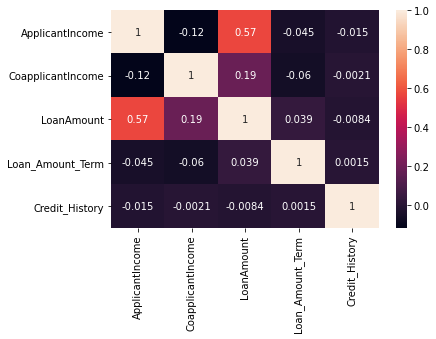

In [14]:
# Visualizing with help of heatmap

# plotting the correlation
sns.heatmap(df_corr,annot=True)
plt.show()

DATASET INFERENCE 
* There are 614 samples in the dataset with 13 Features and one target variable.,where we have to predict where to lend the load or not.
* We can see that there are some missing values in the dataset.
* since missing values in the dataset exists less than 1/10 per feautre, we can safely impute those values.

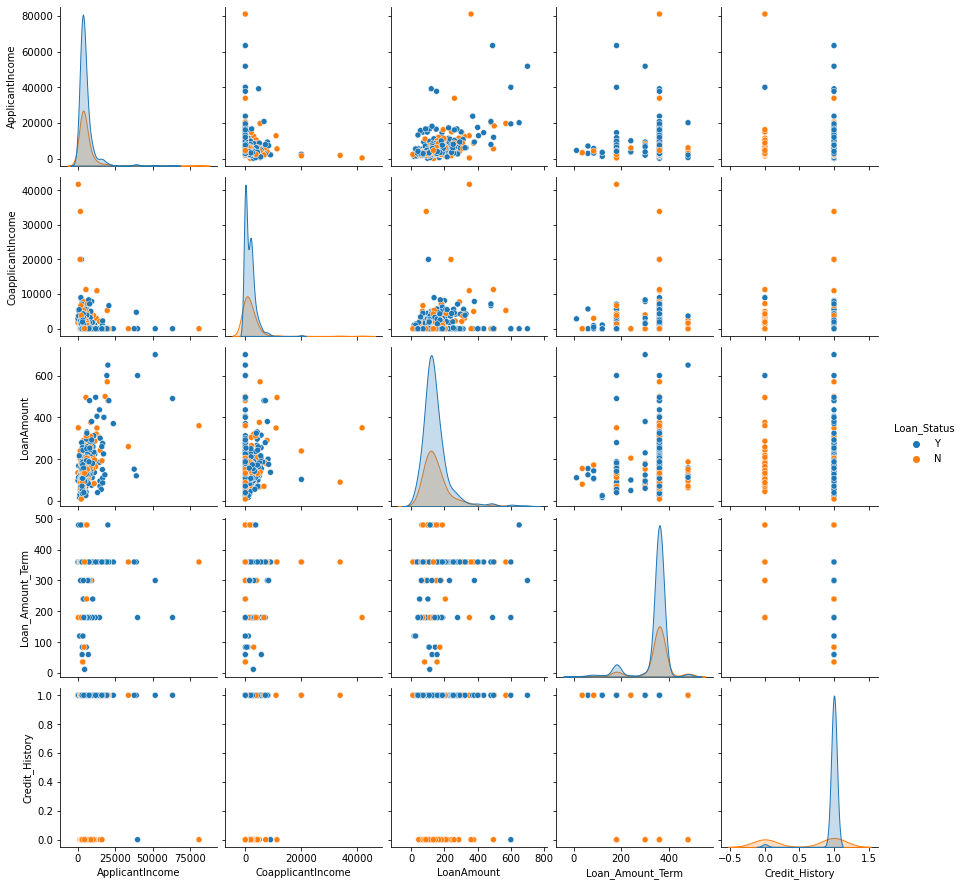

In [19]:
# pairplot of the datasets
sns.pairplot(df,diag_kind='kde',hue='Loan_Status')
plt.show()

UNIVARIATE ANALYSIS

In [20]:
# Plot function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

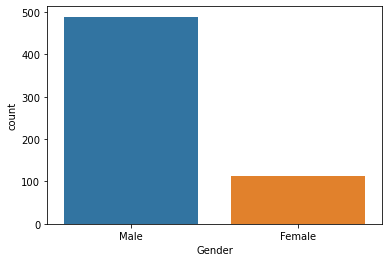

Male      489
Female    112
Name: Gender, dtype: int64

In [39]:
## Gender:
sns.countplot(df.Gender)
plt.show()
df.Gender.value_counts()

Most of the loan applicants are male 

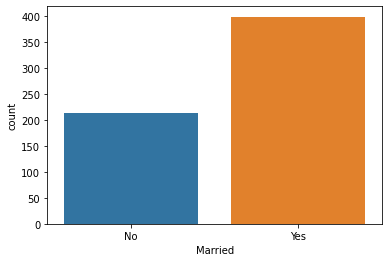

Yes    398
No     213
Name: Married, dtype: int64

In [40]:
# Married:
sns.countplot(df.Married)
plt.show()
df.Married.value_counts()

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


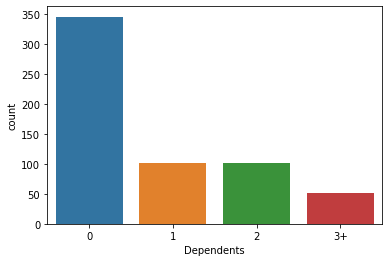

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [38]:
# Dependence:
sns.countplot(df.Dependents,order=df.Dependents.value_counts().index)
plt.show()
df.Dependents.value_counts()


Most of the applicants have no dependencies.
A very few of the applicant have 3 or more peole depending on them.

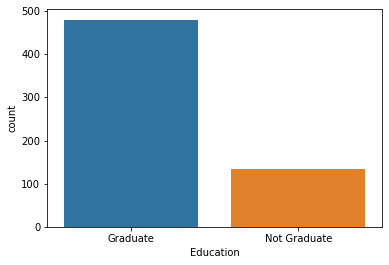

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [37]:
# Education
sns.countplot(df.Education)
plt.show()
df.Education.value_counts()

Most of the Loan application belongs to the Graduated persons

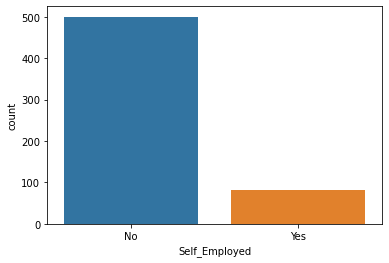

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [36]:
# Self-Employed
sns.countplot(df.Self_Employed)
plt.show()
df.Self_Employed.value_counts()

Most Loan applicants are salaried

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

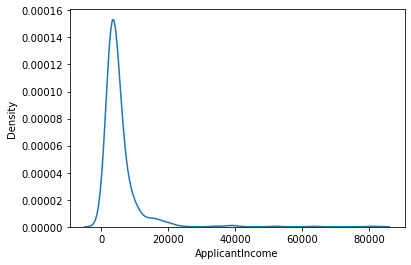

In [43]:
# Applicant Income
sns.distplot(df.ApplicantIncome,hist=False)

<AxesSubplot:>

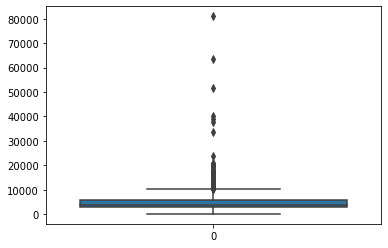

In [45]:
sns.boxplot(data=df.ApplicantIncome,orient='v')

We can observer outliers in the Income feature. Mazority of loan applicant_income is  under 20K.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

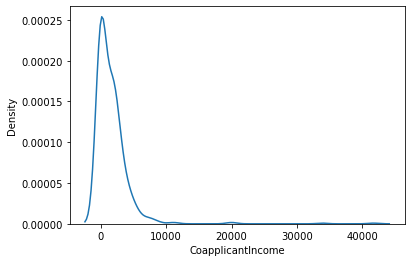

In [48]:
# Co-applicant Income:
sns.distplot(df.CoapplicantIncome,hist=False)

In [49]:
df.CoapplicantIncome.value_counts()/len(df) * 100


0.0       44.462541
1666.0     0.814332
2083.0     0.814332
2500.0     0.814332
1750.0     0.488599
            ...    
7166.0     0.162866
2138.0     0.162866
2166.0     0.162866
3541.0     0.162866
3021.0     0.162866
Name: CoapplicantIncome, Length: 287, dtype: float64

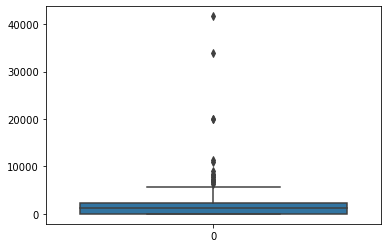

In [51]:
sns.boxplot(data=df.CoapplicantIncome,orient='v')
plt.show()

Around 45 percent of the Applicants don't have co applicant . the majority of coapplicants have income less than 10K .
The data has outliers 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

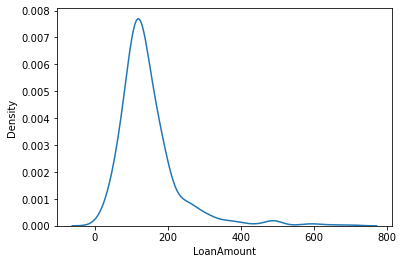

In [53]:
# LoanAmount
sns.distplot(df.LoanAmount,hist=False)

In [54]:
df.dropna().sort_values('LoanAmount',ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y


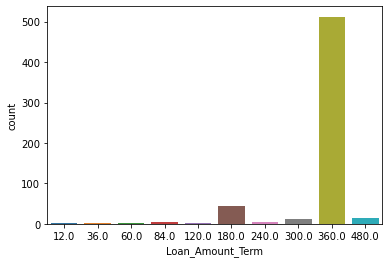

30.0    512
15.0     44
40.0     15
25.0     13
7.0       4
20.0      4
10.0      3
3.0       2
5.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [60]:
# Loan_Amount_Term
sns.countplot(df.Loan_Amount_Term)
plt.show()
(df.Loan_Amount_Term/12).value_counts() # in years


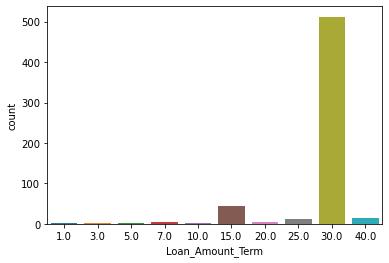

In [59]:
sns.countplot(df.Loan_Amount_Term/12)
plt.show()

In [62]:
df[df.Loan_Amount_Term == 360]['LoanAmount'].median()

129.0

* Probabilty of being a Housing Loan is high for a tenure of 30 years 

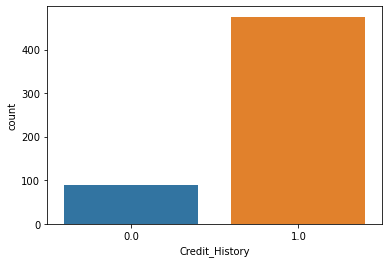

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [66]:
# Credit_History

sns.countplot(df.Credit_History)
plt.show()
df.Credit_History.value_counts()

In [68]:
#applicants with negative credit_history
df[df.Credit_History == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [69]:
df[df.Credit_History == 0]['Loan_Status'].value_counts()/len(df[df.Credit_History == 0]) * 100

N    92.134831
Y     7.865169
Name: Loan_Status, dtype: float64

 7 percent of guys wih negative credit_history got their loan approved

In [70]:
# for  these 7 percent 
df[((df.Credit_History == 0) & (df.Loan_Status == 'Y'))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


LP001882 & LP001536 mustr be re reviwed as they can be NPA 

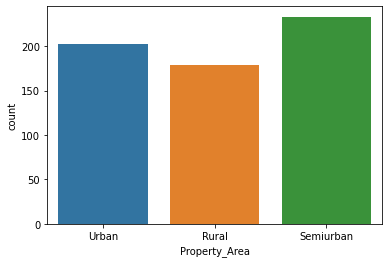

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [73]:
# property area
sns.countplot(df.Property_Area)
plt.show()
df.Property_Area.value_counts()

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

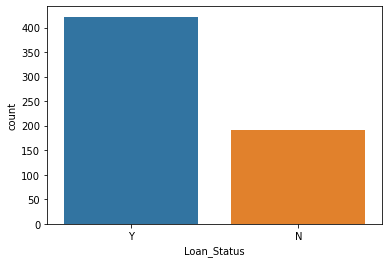

In [76]:
#Target : Loan_Status
sns.countplot(df.Loan_Status)
df.Loan_Status.value_counts()/len(df.Loan_Status)

Multivariate 

In [77]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


(0.0, 25000.0)

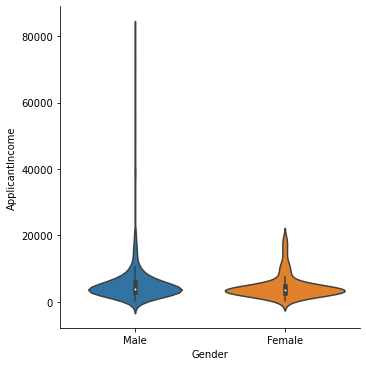

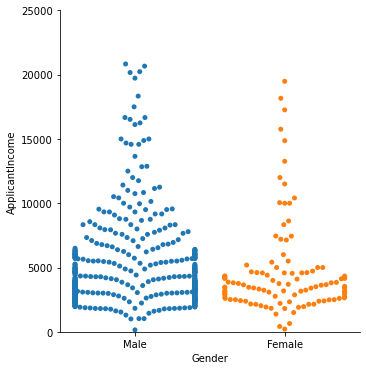

In [78]:

sns.catplot('Gender','ApplicantIncome',data=df,kind='violin')

sns.catplot('Gender','ApplicantIncome',data=df,kind='swarm')
plt.ylim([0,25000])

Most of the applicant have a salary under 6K.

<Figure size 1080x1080 with 0 Axes>

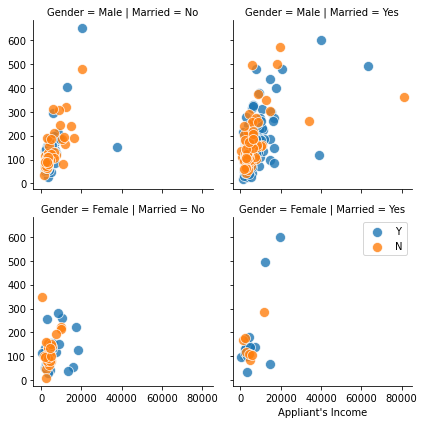

In [87]:
fig_this_size(15,15)
g = sns.FacetGrid(df, col="Married",  row="Gender",hue='Loan_Status')

g.map_dataframe(sns.scatterplot, x="ApplicantIncome",y = 'LoanAmount',s=100,alpha=0.8)
plt.legend()
plt.xlabel("Appliant's Income")
plt.ylabel('Applied Loan Amount')
plt.tight_layout()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

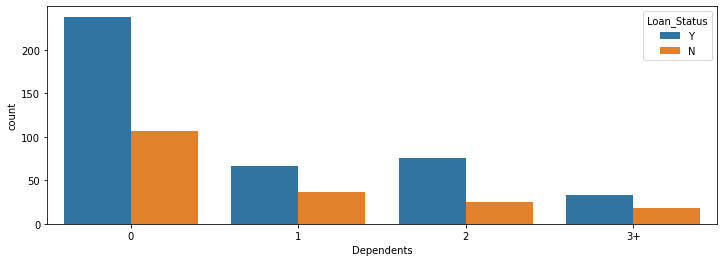

In [88]:

# dependents vs Loan_Status
fig_this_size(12,4)
sns.countplot(df.Dependents,hue=df.Loan_Status)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

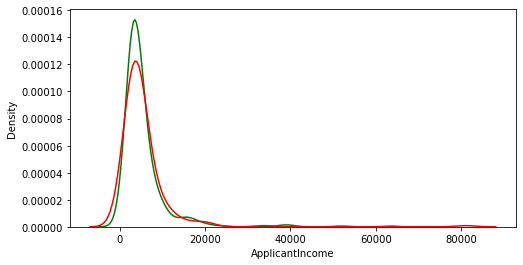

In [95]:
# income with credit history
fig = fig_this_size(8,4)
sns.distplot(df[df.Loan_Status == 'Y'].ApplicantIncome,color='green',hist=False)
sns.distplot(df[df.Loan_Status == 'N'].ApplicantIncome,color='red',hist=False)


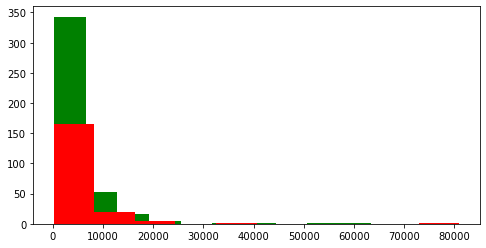

In [96]:
fig = fig_this_size(8,4)
plt.hist(df[df.Loan_Status == 'Y'].ApplicantIncome,color='green')
plt.hist(df[df.Loan_Status == 'N'].ApplicantIncome,color='red');

Adressing the missing values

creating a copy of the raw dataframe and clean that dataset and build a model on top of that dataset cleaned dataset.

In [97]:
df_cleaned = df.copy()
df_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
# Dropping the Loan_ID  feature asit will not be requrired .
df_cleaned.drop('Loan_ID',1,inplace=True)

In [101]:
df_cleaned['ApplicantIncome'].fillna(df_cleaned['ApplicantIncome'].mean(),inplace=True)
df_cleaned['CoapplicantIncome'].fillna(df_cleaned['CoapplicantIncome'].mean(),inplace=True)
df_cleaned['LoanAmount'].fillna(df_cleaned['LoanAmount'].mean(),inplace=True)
df_cleaned['Loan_Amount_Term'].fillna(df_cleaned['Loan_Amount_Term'].mean(),inplace=True)
df_cleaned['Credit_History'].fillna(df_cleaned['Credit_History'].mean(),inplace=True)

In [ ]:
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status'

In [108]:
df_cleaned['Gender'].fillna(df_cleaned['Gender'].mode()[0],inplace=True)
df_cleaned['Married'].fillna(df_cleaned['Married'].mode()[0],inplace=True)
df_cleaned['Dependents'].fillna(df_cleaned['Dependents'].mode()[0],inplace=True)
df_cleaned['Education'].fillna(df_cleaned['Education'].mode()[0],inplace=True)
df_cleaned['Self_Employed'].fillna(df_cleaned['Self_Employed'].mode()[0],inplace=True)
df_cleaned['Property_Area'].fillna(df_cleaned['Property_Area'].mode()[0],inplace=True)
df_cleaned['Loan_Status'].fillna(df_cleaned['Loan_Status'].mode()[0],inplace=True)


In [109]:
len(df_cleaned)


614

In [110]:
df_cleaned.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

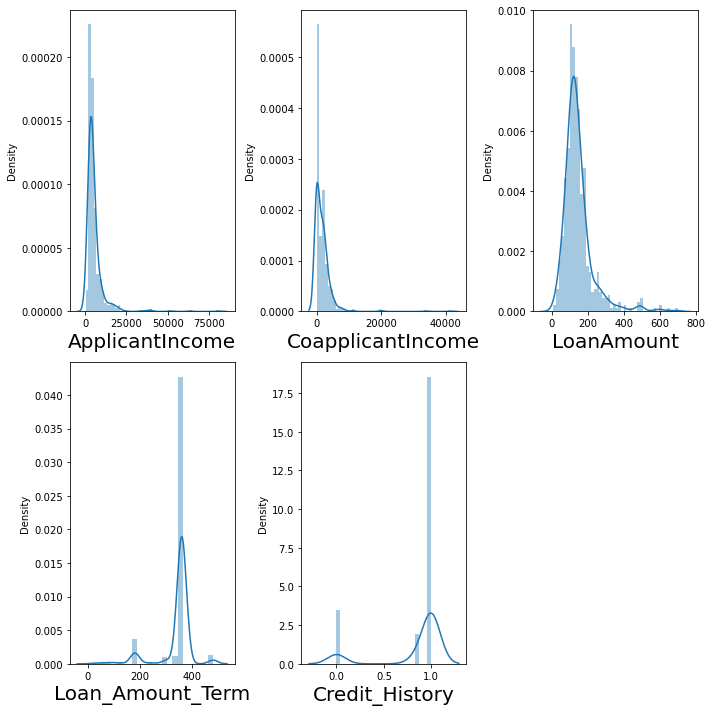

In [118]:
#Visualizartion displot 
plt.figure(figsize =(10,10))
plt_num =1
for i in df_cleaned[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]:
    if plt_num<=6:
        ax  =plt.subplot(2,3,plt_num)
        sns.distplot(df_cleaned[i])
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

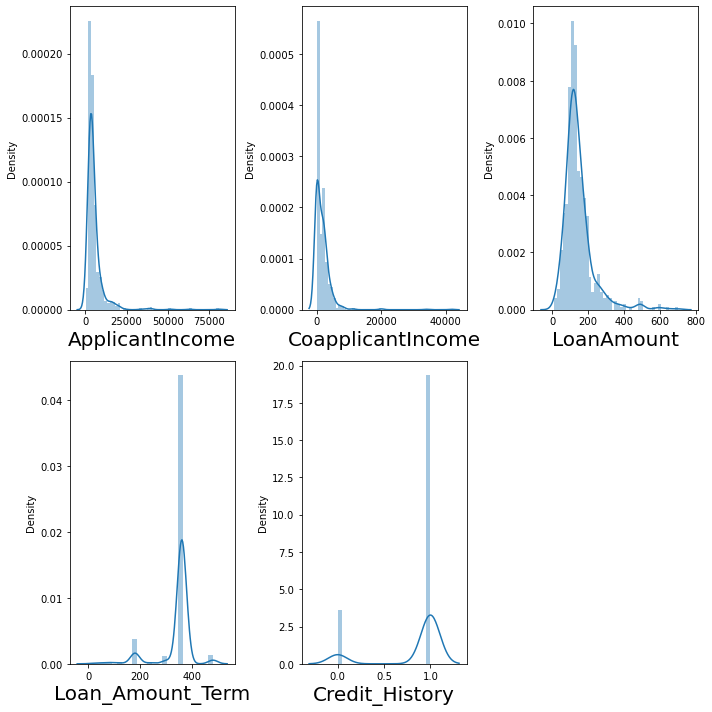

In [119]:
#Visualizartion displot 
plt.figure(figsize =(10,10))
plt_num =1
for i in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]:
    if plt_num<=6:
        ax  =plt.subplot(2,3,plt_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

* Since the variation of data doesn't get visually noticed , it will be safe to assume all of them are working fine

Dealing with outliers

In [120]:
# categories to impute:
features_with_outliers = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

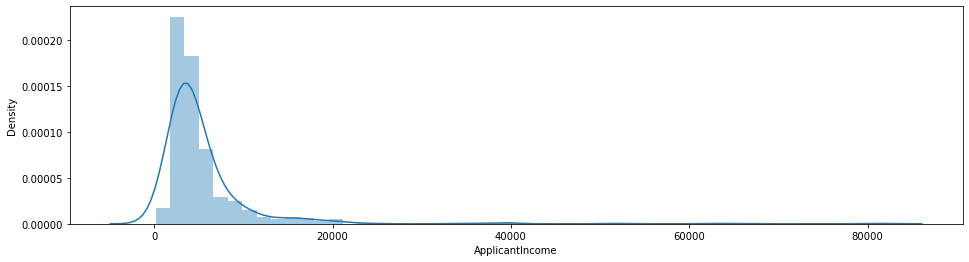

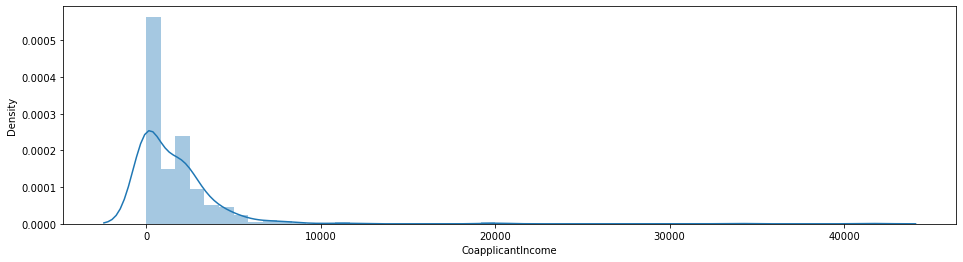

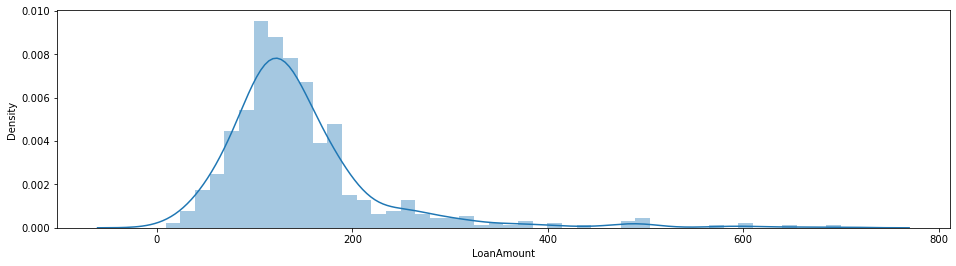

In [121]:

for col in features_with_outliers:
    
    fig_this_size(16,4)
    sns.distplot(df_cleaned[col])

In [122]:
# checking skewness
df_cleaned.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [ ]:
We can see Outliers for applicant income and CoapplicantIncome, need to remome it , categoricalvalues may remain

In [125]:
# let's remove the values in the IQR method:
Q1 = df_cleaned[features_with_outliers].quantile(0.25)
Q3 = df_cleaned[features_with_outliers].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
dtype: float64


In [127]:
df_cleaned = df_cleaned[~((df_cleaned[features_with_outliers] < (Q1 - 1.5 * IQR)) |(df_cleaned[features_with_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [128]:
df_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [129]:
#Data loss
len(df)-len(df_cleaned)


79

In [130]:
df_cleaned.skew()

ApplicantIncome      1.142234
CoapplicantIncome    0.845905
LoanAmount           0.401178
Loan_Amount_Term    -2.413912
Credit_History      -1.955775
dtype: float64

In [131]:
trnsfm_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [132]:
np.log(df_cleaned[trnsfm_var]+1).skew()

ApplicantIncome     -0.982387
CoapplicantIncome   -0.255735
LoanAmount          -1.333208
dtype: float64

In [133]:
np.sqrt(df_cleaned[trnsfm_var]).skew()

ApplicantIncome      0.455680
CoapplicantIncome    0.070591
LoanAmount          -0.314177
dtype: float64

In [134]:
# let's continue with the sqrt transformation
df_cleaned[trnsfm_var] = np.sqrt(df_cleaned[trnsfm_var])

Encoding the Categorical Value

In [135]:
from sklearn.preprocessing import LabelEncoder

In [137]:
lab_enc =LabelEncoder()
df_cleaned["Gender"]  = lab_enc.fit_transform(df_cleaned['Gender'])
df_cleaned["Married"]  = lab_enc.fit_transform(df_cleaned['Married'])
df_cleaned["Dependents"]  = lab_enc.fit_transform(df_cleaned['Dependents'])
df_cleaned["Education"]  = lab_enc.fit_transform(df_cleaned['Education'])
df_cleaned["Self_Employed"]  = lab_enc.fit_transform(df_cleaned['Self_Employed'])
df_cleaned["Property_Area"]  = lab_enc.fit_transform(df_cleaned['Property_Area'])
df_cleaned["Loan_Status"]  = lab_enc.fit_transform(df_cleaned['Loan_Status'])

In [138]:
df_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,12.100089,360.0,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1


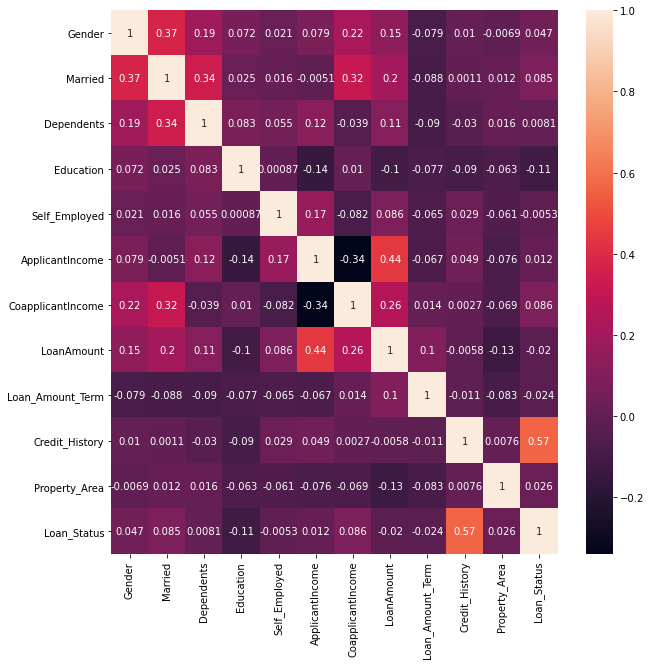

In [142]:
# check the corrations once more,
plt.figure(figsize=[10,10])
sns.heatmap(df_cleaned.corr(),annot=True)
plt.show()

## Train Test Split 
### Setting X and y axis and splitting the data into train and test respectively.


In [144]:
X = df_cleaned.drop('Loan_Status',1)
y = df_cleaned.Loan_Status

In [145]:
# check the shapes 
X.shape,y.shape

((535, 11), (535,))

In [147]:
## Splitting the training anf test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

In [149]:
#shapes
print ('XTRAIN \n',X_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',X_test.shape)
print ('YTRAIN \n',y_test.shape)


XTRAIN 
 (358, 11)
YTRAIN 
 (358,)
XTEST 
 (177, 11)
YTRAIN 
 (177,)


In [150]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [151]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [152]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_test,y_test))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test)))
    print('Precision:',recall_score(y_test,model.predict(X_test)))
    print('F1:',recall_score(y_test,model.predict(X_test)))

In [153]:
#Model1: Logistic Regression
train_n_ret_scores(LogisticRegression())

Train_Acc: 0.8192090395480226
Test_Acc: 0.8192090395480226
Recall: 1.0
Precision: 1.0
F1: 1.0


In [154]:
#Model2: Support Vector Classifier
train_n_ret_scores(SVC(kernel='linear'))

Train_Acc: 0.8192090395480226
Test_Acc: 0.8192090395480226
Recall: 1.0
Precision: 1.0
F1: 1.0


In [155]:
#Model: KNN model
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.632768361581921
Test_Acc: 0.632768361581921
Recall: 0.864406779661017
Precision: 0.864406779661017
F1: 0.864406779661017


In [156]:
#Model4: Decision Trees Classifier
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 0.7401129943502824
Test_Acc: 0.7401129943502824
Recall: 0.8305084745762712
Precision: 0.8305084745762712
F1: 0.8305084745762712


In [157]:
#Model5:Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.807909604519774
Test_Acc: 0.807909604519774
Recall: 0.9745762711864406
Precision: 0.9745762711864406
F1: 0.9745762711864406


In [158]:
#Model6 Adaboost with Logistic
train_n_ret_scores(AdaBoostClassifier(base_estimator=LogisticRegression()))

Train_Acc: 0.8192090395480226
Test_Acc: 0.8192090395480226
Recall: 1.0
Precision: 1.0
F1: 1.0


In [159]:


models = [LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),AdaBoostClassifier(LogisticRegression())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Tree Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Tree
Adaboost


In [160]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.826816,0.819209,0.819209,0.819209,0.819209,0.821244
1,SVC,0.824022,0.819209,0.819209,0.819209,0.819209,0.824061
2,KNN,0.773743,0.632768,0.632768,0.632768,0.632768,0.667410
3,Random_forest,1.000000,0.734463,0.734463,0.734463,0.734463,0.701213
4,Decision_Tree,1.000000,0.802260,0.802260,0.802260,0.802260,0.804617
5,Adaboost,0.826816,0.819209,0.819209,0.819209,0.819209,0.821244


BEST MODEL after considering Cross Validation will be SVC as the difference for it model is lower amongst all

In [ ]:
### HyperParaneter Tuning for SVC

In [162]:
from sklearn.model_selection import GridSearchCV

In [173]:
param_dict = {
    'C':[40,50,60,70,80,90,100,110,120],
    'gamma':[0.001,0.0015,0.002,0.0025,0.0009]
}

In [174]:
GSV = GridSearchCV(SVC(),param_grid=param_dict)
GSV.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [40, 50, 60, 70, 80, 90, 100, 110, 120],
                         'gamma': [0.001, 0.0015, 0.002, 0.0025, 0.0009]})

In [175]:
GSV.best_params_

{'C': 110, 'gamma': 0.001}

In [183]:
SVC_tuned = SVC(kernel='linear',C=110,gamma=0.001)

SVC_tuned.fit(X_train,y_train)

SVC(C=110, gamma=0.001, kernel='linear')

In [184]:
train_n_ret_scores(SVC_tuned)

Train_Acc: 0.8135593220338984
Test_Acc: 0.8135593220338984
Recall: 0.9915254237288136
Precision: 0.9915254237288136
F1: 0.9915254237288136


In [185]:
y_preds = SVC_tuned.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

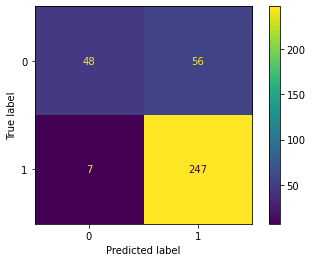

In [186]:
plot_confusion_matrix(SVC_tuned,X_train,y_train)

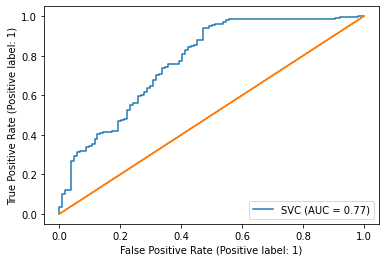

In [188]:
plot_roc_curve(SVC_tuned,X_train,y_train)
plt.plot(y_train,y_train)
plt.show()

In [189]:
## Saving the best model
import joblib 
joblib.dump(SVC_tuned,'loan_prediction_class.pkl')

['loan_prediction_class.pkl']